In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [7]:
df_smoker = pd.read_csv('/Users/katari/Desktop/git/Medical_cost_dataset/src/data/smoker_data.csv')
df_smoker = pd.get_dummies(df_smoker,drop_first=True)
df_smoker=df_smoker.drop('Unnamed: 0', axis=1)
df_smoker.drop(['children','sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],axis=1,inplace=True)
X = df_smoker.drop('charges',axis=1)
y = df_smoker['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

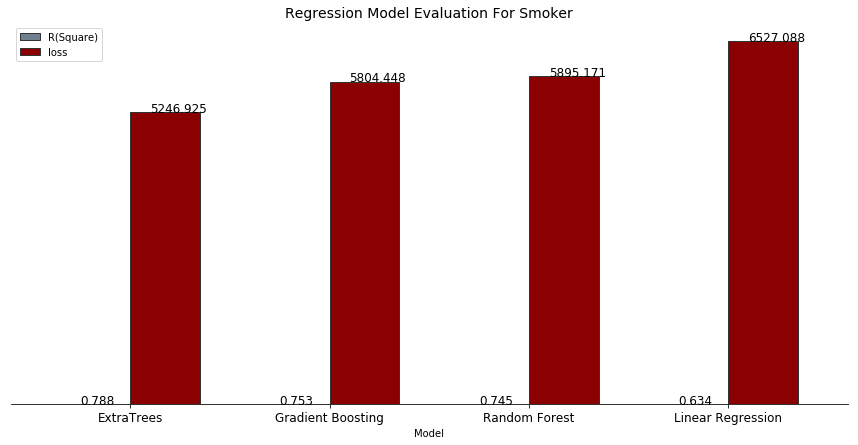

In [8]:
def robust_model(input):
    #Model type to evaluate
    model_list = [ExtraTreesRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),
            LinearRegression()]
    r_score = []
    loss = []
    for reg in model_list:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r_score.append(explained_variance_score(y_pred,y_test))
        loss.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    ## Model score table
    model_str = ['ExtraTrees','Random Forest','Gradient Boosting',
            'Linear Regression']
    other_model = pd.DataFrame(r_score,model_str).reset_index()
    other_model.columns = ['Model','R(Square)']
    other_model['loss'] = loss
    other_model.sort_values('R(Square)',ascending=False,inplace=True)
    ## Model Graph
    ax = other_model[['R(Square)','loss']].plot(kind='bar',width=0.7,
                            figsize=(15,7), color=['slategray', 'darkred'], fontsize=13,edgecolor='0.2')
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()+0.01, \
                str(round((i.get_height()), 3)), fontsize=12, color='black',)
    ax.set_title('Regression Model Evaluation For '+input,fontsize=14,color='black')
    ax.set_xticklabels(other_model.Model, rotation=0, fontsize=12)
    ax.set_xlabel('Model')
    x_axis = ax.axes.get_yaxis().set_visible(False)
    sns.despine(left=True)
    return plt.show()

robust_model('Smoker')